In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset preprocessing

Image (224x224) -> PCA

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Categories=['Patacon-True','Patacon-False']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/patacon-730'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(224,224,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data
y=df.iloc[:,-1] #output data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

loading... category : Patacon-True
loaded category:Patacon-True successfully
loading... category : Patacon-False


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


loaded category:Patacon-False successfully
Splitted Successfully


In [ ]:
from sklearn.decomposition import PCA
pca_dims = PCA()
pca_dims.fit(x_train)

PCA()

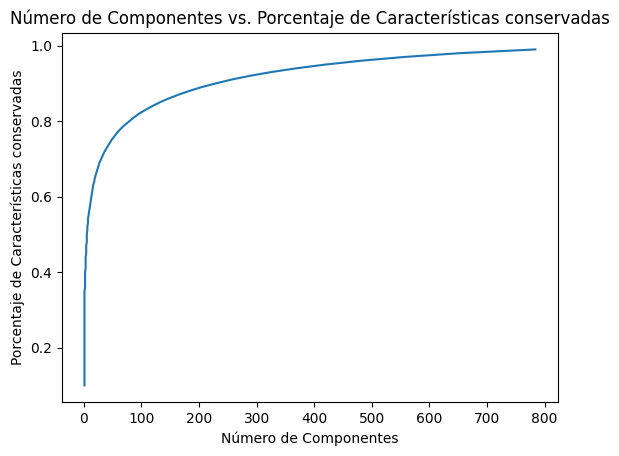

In [ ]:
features = [i/100 for i in range(10, 100, 1)]
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
cumsums = [np.argmax(cumsum >= feat) + 1 for feat in features]
plt.title('Número de Componentes vs. Porcentaje de Características conservadas')
plt.xlabel('Número de Componentes')
plt.ylabel('Porcentaje de Características conservadas')
plt.plot(cumsums, features) #número de componentes vs cuántas características de la imagen puede conservar

In [ ]:
values = {fraction : feats for fraction, feats in zip(features, cumsums)}

In [ ]:
comps = values[0.95] #el 96% de las características estará en los componentes
comps

420

In [ ]:
import joblib

pca = joblib.load("/content/pca_model.pkl")

In [ ]:
#pca = PCA(n_components=comps)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

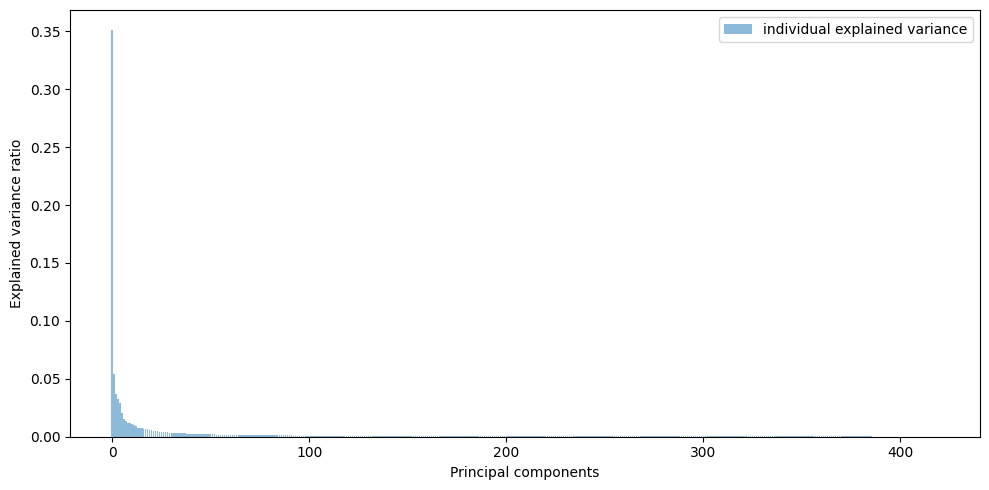

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.bar(range(comps), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

## lazypredict

F1 score for multiple ML algorithms

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=4,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_pca, x_test_pca, y_train, y_test)

  3%|▎         | 1/29 [00:03<01:38,  3.52s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7226027397260274, 'Balanced Accuracy': 0.7226027397260274, 'ROC AUC': 0.7226027397260274, 'F1 Score': 0.722443231825383, 'Time taken': 3.5235252380371094}


  7%|▋         | 2/29 [00:07<01:37,  3.62s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.7534246575342466, 'Balanced Accuracy': 0.7534246575342466, 'ROC AUC': 0.7534246575342466, 'F1 Score': 0.7507941776113034, 'Time taken': 3.6874186992645264}
{'Model': 'BernoulliNB', 'Accuracy': 0.660958904109589, 'Balanced Accuracy': 0.660958904109589, 'ROC AUC': 0.660958904109589, 'F1 Score': 0.6609549276943105, 'Time taken': 0.06476879119873047}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 14%|█▍        | 4/29 [00:09<00:55,  2.22s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7602739726027398, 'Balanced Accuracy': 0.7602739726027398, 'ROC AUC': 0.7602739726027398, 'F1 Score': 0.760093896713615, 'Time taken': 2.7062764167785645}


 21%|██        | 6/29 [00:10<00:30,  1.31s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7465753424657534, 'Balanced Accuracy': 0.7465753424657534, 'ROC AUC': 0.7465753424657534, 'F1 Score': 0.7465634529673939, 'Time taken': 0.5435912609100342}
{'Model': 'DummyClassifier', 'Accuracy': 0.5, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3333333333333333, 'Time taken': 0.04014778137207031}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.6815068493150684, 'Balanced Accuracy': 0.6815068493150684, 'ROC AUC': 0.6815068493150686, 'F1 Score': 0.6814134375109985, 'Time taken': 0.04401421546936035}


 38%|███▊      | 11/29 [00:11<00:09,  1.87it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7671232876712328, 'Balanced Accuracy': 0.7671232876712328, 'ROC AUC': 0.7671232876712328, 'F1 Score': 0.7649621212121213, 'Time taken': 0.5926737785339355}
{'Model': 'GaussianNB', 'Accuracy': 0.6027397260273972, 'Balanced Accuracy': 0.6027397260273972, 'ROC AUC': 0.6027397260273972, 'F1 Score': 0.5589583333333333, 'Time taken': 0.04770469665527344}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5856164383561644, 'Balanced Accuracy': 0.5856164383561644, 'ROC AUC': 0.5856164383561644, 'F1 Score': 0.5185260891487129, 'Time taken': 0.0653681755065918}


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
 41%|████▏     | 12/29 [00:11<00:07,  2.17it/s]/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
 45%|████▍     | 13/29 [00:11<00:06,  2.50it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.6506849315068494, 'Balanced Accuracy': 0.6506849315068493, 'ROC AUC': 0.6506849315068493, 'F1 Score': 0.6021373230029389, 'Time taken': 0.1333768367767334}
{'Model': 'LabelSpreading', 'Accuracy': 0.6506849315068494, 'Balanced Accuracy': 0.6506849315068493, 'ROC AUC': 0.6506849315068493, 'F1 Score': 0.6021373230029389, 'Time taken': 0.17397260665893555}


 48%|████▊     | 14/29 [00:12<00:05,  2.51it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7636986301369864, 'Balanced Accuracy': 0.7636986301369864, 'ROC AUC': 0.7636986301369864, 'F1 Score': 0.7636958586960346, 'Time taken': 0.36899495124816895}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 55%|█████▌    | 16/29 [00:12<00:04,  2.61it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.773972602739726, 'Balanced Accuracy': 0.773972602739726, 'ROC AUC': 0.773972602739726, 'F1 Score': 0.7738771295818276, 'Time taken': 0.7173483371734619}
{'Model': 'LogisticRegression', 'Accuracy': 0.7808219178082192, 'Balanced Accuracy': 0.7808219178082192, 'ROC AUC': 0.7808219178082192, 'F1 Score': 0.7808116349988272, 'Time taken': 0.11237859725952148}


 59%|█████▊    | 17/29 [00:13<00:03,  3.11it/s]

{'Model': 'NearestCentroid', 'Accuracy': 0.7636986301369864, 'Balanced Accuracy': 0.7636986301369864, 'ROC AUC': 0.7636986301369864, 'F1 Score': 0.7636958586960346, 'Time taken': 0.15634679794311523}


 66%|██████▌   | 19/29 [00:13<00:02,  3.50it/s]

{'Model': 'NuSVC', 'Accuracy': 0.7842465753424658, 'Balanced Accuracy': 0.7842465753424658, 'ROC AUC': 0.7842465753424659, 'F1 Score': 0.7835127978817299, 'Time taken': 0.41762256622314453}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.7363013698630136, 'Balanced Accuracy': 0.7363013698630136, 'ROC AUC': 0.7363013698630136, 'F1 Score': 0.7362240289069556, 'Time taken': 0.125258207321167}


 69%|██████▉   | 20/29 [00:13<00:02,  4.28it/s]

{'Model': 'Perceptron', 'Accuracy': 0.7294520547945206, 'Balanced Accuracy': 0.7294520547945205, 'ROC AUC': 0.7294520547945206, 'F1 Score': 0.7293727049824611, 'Time taken': 0.10241961479187012}


 72%|███████▏  | 21/29 [00:13<00:01,  4.06it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.75, 'Balanced Accuracy': 0.75, 'ROC AUC': 0.75, 'F1 Score': 0.7342906647719483, 'Time taken': 0.2734673023223877}


 79%|███████▉  | 23/29 [00:16<00:03,  1.71it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7808219178082192, 'Balanced Accuracy': 0.7808219178082192, 'ROC AUC': 0.7808219178082192, 'F1 Score': 0.7807293377763177, 'Time taken': 2.0852982997894287}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7636986301369864, 'Balanced Accuracy': 0.7636986301369864, 'ROC AUC': 0.7636986301369864, 'F1 Score': 0.7636958586960346, 'Time taken': 0.10049295425415039}


 86%|████████▌ | 25/29 [00:16<00:01,  2.58it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7671232876712328, 'Balanced Accuracy': 0.7671232876712328, 'ROC AUC': 0.7671232876712328, 'F1 Score': 0.7671123621862539, 'Time taken': 0.2928125858306885}
{'Model': 'SGDClassifier', 'Accuracy': 0.7602739726027398, 'Balanced Accuracy': 0.7602739726027397, 'ROC AUC': 0.7602739726027398, 'F1 Score': 0.7599924850875956, 'Time taken': 0.1087486743927002}


 90%|████████▉ | 26/29 [00:17<00:01,  2.52it/s]

{'Model': 'SVC', 'Accuracy': 0.773972602739726, 'Balanced Accuracy': 0.773972602739726, 'ROC AUC': 0.7739726027397261, 'F1 Score': 0.771875, 'Time taken': 0.41861963272094727}


 97%|█████████▋| 28/29 [00:19<00:00,  1.41it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.8013698630136986, 'Balanced Accuracy': 0.8013698630136986, 'ROC AUC': 0.8013698630136986, 'F1 Score': 0.8012859623597879, 'Time taken': 2.1439504623413086}
[LightGBM] [Info] Number of positive: 584, number of negative: 584
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 107100
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:20<00:00,  1.41it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8184931506849316, 'Balanced Accuracy': 0.8184931506849316, 'ROC AUC': 0.8184931506849316, 'F1 Score': 0.818132675245314, 'Time taken': 1.3987326622009277}


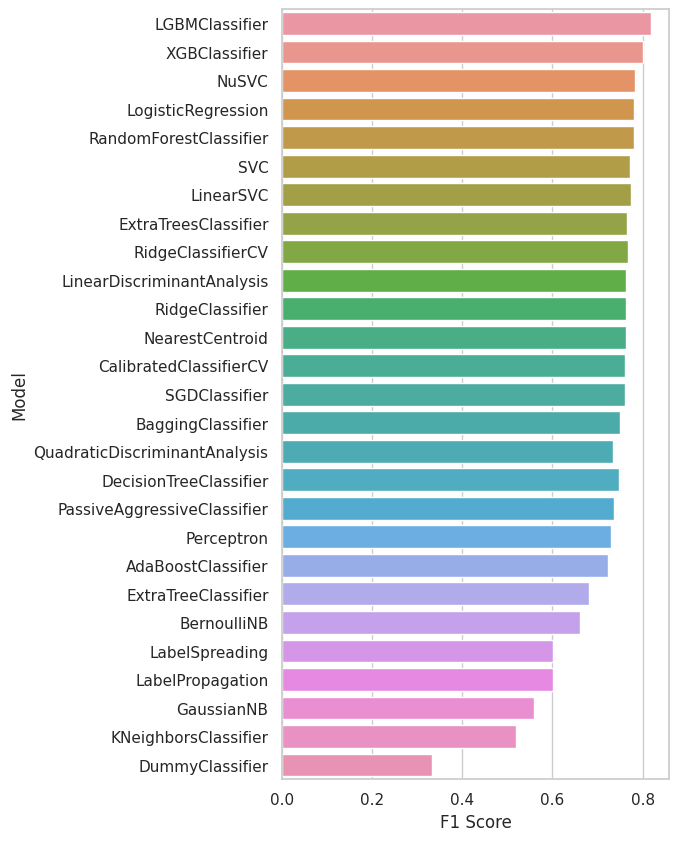

In [ ]:
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="F1 Score", data=predictions)

In [ ]:
file_path = 'lazypredict_results.xlsx'  # Define the file path where you want to save the Excel file
models.to_excel(file_path, index=True)

## Gridsearchcv

Choose multiple parameters and see which combinations get the best f1 scores

In [ ]:
from sklearn.model_selection import GridSearchCV
def predict(model, pca, url, threshold = .8):
  img=imread(url)
  plt.imshow(img)
  plt.show()
  img_resize = resize(img,(224,224,3))
  l=[img_resize.flatten()]
  l = pca.transform(l)
  probability=model.predict_proba(l)

  prediction = "Patacon-True" if probability[0][Categories.index("Patacon-True")] > threshold else "Patacon-False" #change classes if necesarry and logic if there are more than two classes
  print(probability[0][Categories.index("Patacon-True")])
  print("The predicted image is : "+ prediction)

In [ ]:
from sklearn import svm

param_grid={'C':[0.1,1,10,100,1000],'gamma':[0.00001, 0.0001,0.001,0.1,1,1.5, 2],'kernel':['rbf','poly','sigmoid']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid, verbose = 4)
model.fit(x_train_pca ,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.654 total time=   1.0s
[CV 2/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.735 total time=   1.0s
[CV 3/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.692 total time=   0.9s
[CV 4/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.639 total time=   0.9s
[CV 5/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.734 total time=   1.0s
[CV 1/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.500 total time=   0.8s
[CV 2/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.509 total time=   0.8s
[CV 3/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.491 total time=   0.8s
[CV 4/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.498 total time=   0.8s
[CV 5/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.498 total time=   0.8s
[CV 1/5] END C=0.1, gamma=1e-05, kernel=sigmoid;, score=0.645 total time=   0.9s
[CV 2/5] END C=0.1, gamma=1e-05, kernel=sigmoi

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.1, 1, 1.5, 2],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=4)

In [ ]:
model.best_params_, model.best_score_

({'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.8193609918931808)

In [ ]:
import joblib
filename = 'pca_svm_v2.sav'
joblib.dump(model, filename)

['pca_svm_v2.sav']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for each model
knn_param_grid = {'n_neighbors': [1+(2*i) for i in range(1, 10)]}
dt_param_grid = {'max_depth': [None, 1, 5, 10, 15, 20, 50]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 1, 5, 10, 15, 20, 50]}

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, verbose = 4, scoring='f1')
knn_grid.fit(x_train_pca, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.718 total time=   0.2s
[CV 2/5] END .....................n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.756 total time=   0.2s
[CV 4/5] END .....................n_neighbors=3;, score=0.754 total time=   0.1s
[CV 5/5] END .....................n_neighbors=3;, score=0.757 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.734 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.762 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.752 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.713 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.776 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.760 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='f1', verbose=4)

In [ ]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 9}, 0.7487957508647198)

In [ ]:
dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, verbose = 4, scoring='f1')
dt_grid.fit(x_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ....................max_depth=None;, score=0.678 total time=   0.4s
[CV 2/5] END ....................max_depth=None;, score=0.717 total time=   0.4s
[CV 3/5] END ....................max_depth=None;, score=0.655 total time=   0.4s
[CV 4/5] END ....................max_depth=None;, score=0.684 total time=   0.4s
[CV 5/5] END ....................max_depth=None;, score=0.736 total time=   0.4s
[CV 1/5] END .......................max_depth=1;, score=0.548 total time=   0.1s
[CV 2/5] END .......................max_depth=1;, score=0.615 total time=   0.1s
[CV 3/5] END .......................max_depth=1;, score=0.584 total time=   0.1s
[CV 4/5] END .......................max_depth=1;, score=0.450 total time=   0.1s
[CV 5/5] END .......................max_depth=1;, score=0.601 total time=   0.1s
[CV 1/5] END .......................max_depth=5;, score=0.661 total time=   0.2s
[CV 2/5] END .......................max_depth=5;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 5, 10, 15, 20, 50]},
             scoring='f1', verbose=4)

In [ ]:
dt_grid.best_params_, dt_grid.best_score_

({'max_depth': None}, 0.6939630100007109)

In [ ]:
filename = 'pca_decision_tree.sav'
joblib.dump(dt_grid, filename)

['pca_decision_tree.sav']

In [ ]:
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, verbose = 4, scoring='f1')
rf_grid.fit(x_train_pca, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.700 total time=   0.7s
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.739 total time=   0.8s
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.713 total time=   0.8s
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.683 total time=   0.8s
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.715 total time=   0.7s
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.698 total time=   1.5s
[CV 2/5] END ..max_depth=None, n_estimators=100;, score=0.735 total time=   1.5s
[CV 3/5] END ..max_depth=None, n_estimators=100;, score=0.694 total time=   1.5s
[CV 4/5] END ..max_depth=None, n_estimators=100;, score=0.713 total time=   1.5s
[CV 5/5] END ..max_depth=None, n_estimators=100;, score=0.771 total time=   1.5s
[CV 1/5] END ..max_depth=None, n_estimators=200;, score=0.742 total time=   3.0s
[CV 2/5] END ..max_depth=None, n_estimators=200

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 5, 10, 15, 20, 50],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=4)

In [ ]:
rf_grid.best_params_, rf_grid.best_score_

({'max_depth': 10, 'n_estimators': 50}, 0.7479328782266712)

In [ ]:
rf_grid.best_score_ < knn_grid.best_score_

True

In [ ]:
import joblib
filename = 'pca_knn.sav'
joblib.dump(knn_grid, filename)

['pca_knn.sav']

## Testing...

In [ ]:
import joblib

In [ ]:
model = joblib.load("/content/pca_svm_v2.sav")

In [ ]:
from sklearn.metrics import f1_score

def test(clf):
  y_pred=clf.predict(x_test_pca)
  print(f"The model's f1 score is: {f1_score(y_pred,y_test)}")

In [ ]:
test(model)

The model's f1 score is: 0.8285714285714286
